# Evaluation Project 1 Baseball Case Study

# BY: BHISHAM MOR.

# Batch Number:DS2309.

# Baseball Case Study
This case study involves a dataset that utilizes data from the 2014 Major League Baseball seasons to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. The dataset contains 16 different features that will be used as inputs to the machine learning model, and the output will be a value representing the number of wins.

# Dataset Description
The dataset contains the following input features:

W: Number of wins credited to a pitcher.

R: Runs scored.

AB: At bats or time at bat.

H: Hits.

2B: Doubles.

3B: Triples.

HR: Home runs.

BB: Base on balls (walks).

SO: Strikeouts.

SB: Stolen bases.

RA: Runs average.

ER: Earned runs.

ERA: Earned run average.

CG: Complete games.

SHO: Shutouts.

SV: Saves.

E: Errors.

The target feature is the number of predicted wins (W).

# Importing Libraries and Loading Data


In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r"C:\Users\Ankit\Downloads\baseball.csv")

In [5]:
df.rename(columns={'W': 'Wins', 'R': 'Runs_Scored', 'AB': 'At_Bat', 'H': 'Hits', '2B': 'Doubles', '3B': 'Triples', 'HR': 'Home_Runs', 'BB': 'Base_on_Balls', 'SO': 'Strike_Outs', 'SB': 'Stolen_Bases', 'RA': 'Runs_Average', 'ER': 'Earned_Runs', 'ERA': 'Earned_Run_Average', 'CG': 'Complete_Games', 'SHO': 'Shut_Outs', 'SV': 'Saves', 'E': 'Errors'}, inplace=True)
df.head()

,Wins,Runs_Scored,At_Bat,Hits,Doubles,Triples,Home_Runs,Base_on_Balls,Strike_Outs,Stolen_Bases,Runs_Average,Earned_Runs,Earned_Run_Average,Complete_Games,Shut_Outs,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wins                30 non-null     int64  
 1   Runs_Scored         30 non-null     float64
 2   At_Bat              30 non-null     int64  
 3   Hits                30 non-null     int64  
 4   Doubles             30 non-null     int64  
 5   Triples             30 non-null     int64  
 6   Home_Runs           30 non-null     int64  
 7   Base_on_Balls       30 non-null     int64  
 8   Strike_Outs         30 non-null     int64  
 9   Stolen_Bases        30 non-null     int64  
 10  Runs_Average        30 non-null     int64  
 11  Earned_Runs         30 non-null     int64  
 12  Earned_Run_Average  30 non-null     float64
 13  Complete_Games      30 non-null     float64
 14  Shut_Outs           30 non-null     float64
 15  Saves               30 non-null     float64
 16  Errors    

In [11]:
#shape of dataset
print('Number of columns: ',df.shape[0])
print('Number of Rows:  ',df.shape[1])

Number of columns:  30
Number of Rows:   17


In [12]:
df.columns

Index(['Wins', 'Runs_Scored', 'At_Bat', 'Hits', 'Doubles', 'Triples',
       'Home_Runs', 'Base_on_Balls', 'Strike_Outs', 'Stolen_Bases',
       'Runs_Average', 'Earned_Runs', 'Earned_Run_Average', 'Complete_Games',
       'Shut_Outs', 'Saves', 'Errors'],
      dtype='object')

Comment -

This dataset contains 16 features which contains statistics summary of the Baseball players and the 'W' (wins) is the target variable which predicts the number of wins.
Input features in this dataset are : Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors
Target features : Number of predicted wins (W)
The column names in our dataset appear to be obscure and require interpretation to become comprehensible. To enhance our understanding of the various columns in the dataset, I've referenced baseball statistics terminology from Wikipedia.

In [13]:
# Rename of abbreviated columns 
df.rename(columns={'W' : 'Wins',  'R' : 'Runs Scored', 'AB' : 'At Bat', 'H' : 'Hits', '2B' : 'Doubles','3B' : 'Triples','HR' : 'Home Runs', 'BB' : 'Base on Balls', 'SO' : 'Strike Outs','SB' : 'Stolen Base','RA' : 'Runs Average', 'ER' : 'Earned Runs', 'ERA' : 'Earned Run Average',  'CG' : 'Complete Game','SHO' : 'Shut Outs', 'SV' : 'Saves',  'E' : 'Errors'}, inplace=True)
df.head()

,Wins,Runs_Scored,At_Bat,Hits,Doubles,Triples,Home_Runs,Base_on_Balls,Strike_Outs,Stolen_Bases,Runs_Average,Earned_Runs,Earned_Run_Average,Complete_Games,Shut_Outs,Saves,Errors
0,95,6.586172,5575,1497,300,42,139,383,973,104,641,601,3.73,1.098612,2.197225,4.043051,4.488636
1,83,6.546785,5467,1349,277,44,156,439,1264,70,700,653,4.07,1.098612,2.564949,3.828641,4.465908
2,81,6.507278,5439,1395,303,29,141,533,1157,86,640,584,3.67,2.484907,2.397895,3.663562,4.382027
3,76,6.434547,5533,1381,260,27,136,404,1231,68,701,643,3.98,2.079442,2.302585,3.637586,4.624973
4,74,6.536692,5605,1515,289,49,151,455,1259,83,803,746,4.64,2.079442,2.564949,3.583519,4.465908


In [14]:
# Checking Null Values
df.isnull().sum()

Wins                  0
Runs_Scored           0
At_Bat                0
Hits                  0
Doubles               0
Triples               0
Home_Runs             0
Base_on_Balls         0
Strike_Outs           0
Stolen_Bases          0
Runs_Average          0
Earned_Runs           0
Earned_Run_Average    0
Complete_Games        0
Shut_Outs             0
Saves                 0
Errors                0
dtype: int64

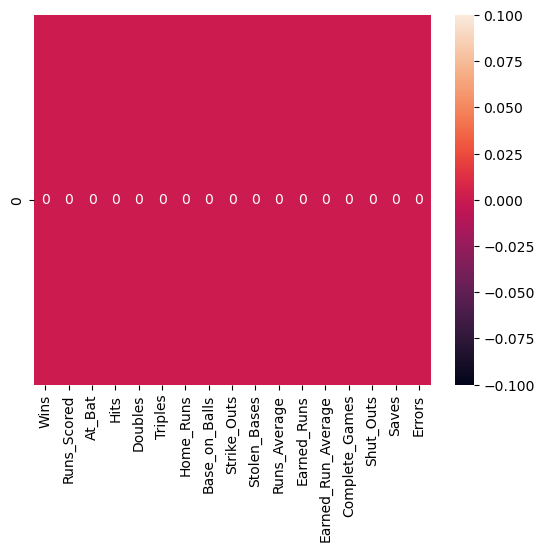

In [15]:
#checking null value through heatmap
sns.heatmap(df.isnull().sum().to_frame().T, annot=True)
plt.show()

Comment:- There is no Null values in this Dataset.

# Statistical Analysis

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Wins,30.0,80.966667,10.453455,63.000000,74.000000,81.000000,87.750000,100.000000
Runs_Scored,30.0,6.532226,0.082466,6.352629,6.480422,6.536692,6.578200,6.793466
At_Bat,30.0,5516.266667,70.467372,5385.000000,5464.000000,5510.000000,5570.000000,5649.000000
Hits,30.0,1403.533333,57.140923,1324.000000,1363.000000,1382.500000,1451.500000,1515.000000
Doubles,30.0,274.733333,18.095405,236.000000,262.250000,275.500000,288.750000,308.000000
Triples,30.0,31.300000,10.452355,13.000000,23.000000,31.000000,39.000000,49.000000
Home_Runs,30.0,163.633333,31.823309,100.000000,140.250000,158.500000,177.000000,232.000000
Base_on_Balls,30.0,469.100000,57.053725,375.000000,428.250000,473.000000,501.250000,570.000000
Strike_Outs,30.0,1248.200000,103.759470,973.000000,1157.500000,1261.500000,1311.500000,1518.000000
Stolen_Bases,30.0,83.500000,22.815225,44.000000,69.000000,83.500000,96.500000,134.000000


Comment-

Statistical analysis reveals slight right skewness in feature distributions. Consistent counts signify a complete dataset. Potential outliers, especially in 'Errors' and 'Run Scored,' warrant attention. Heatmap highlights the need for feature scaling.

<Axes: >

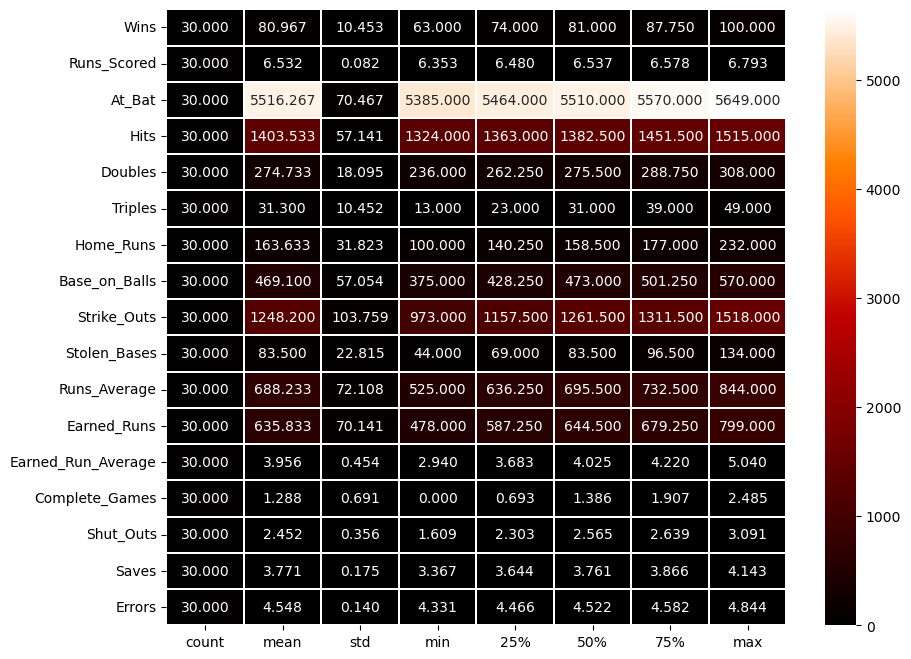

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(df.describe().T,linewidth=0.2,fmt='0.3f' ,annot=True,cmap='gist_heat')

# Exploratory Data Analysis

# Outlier Detection

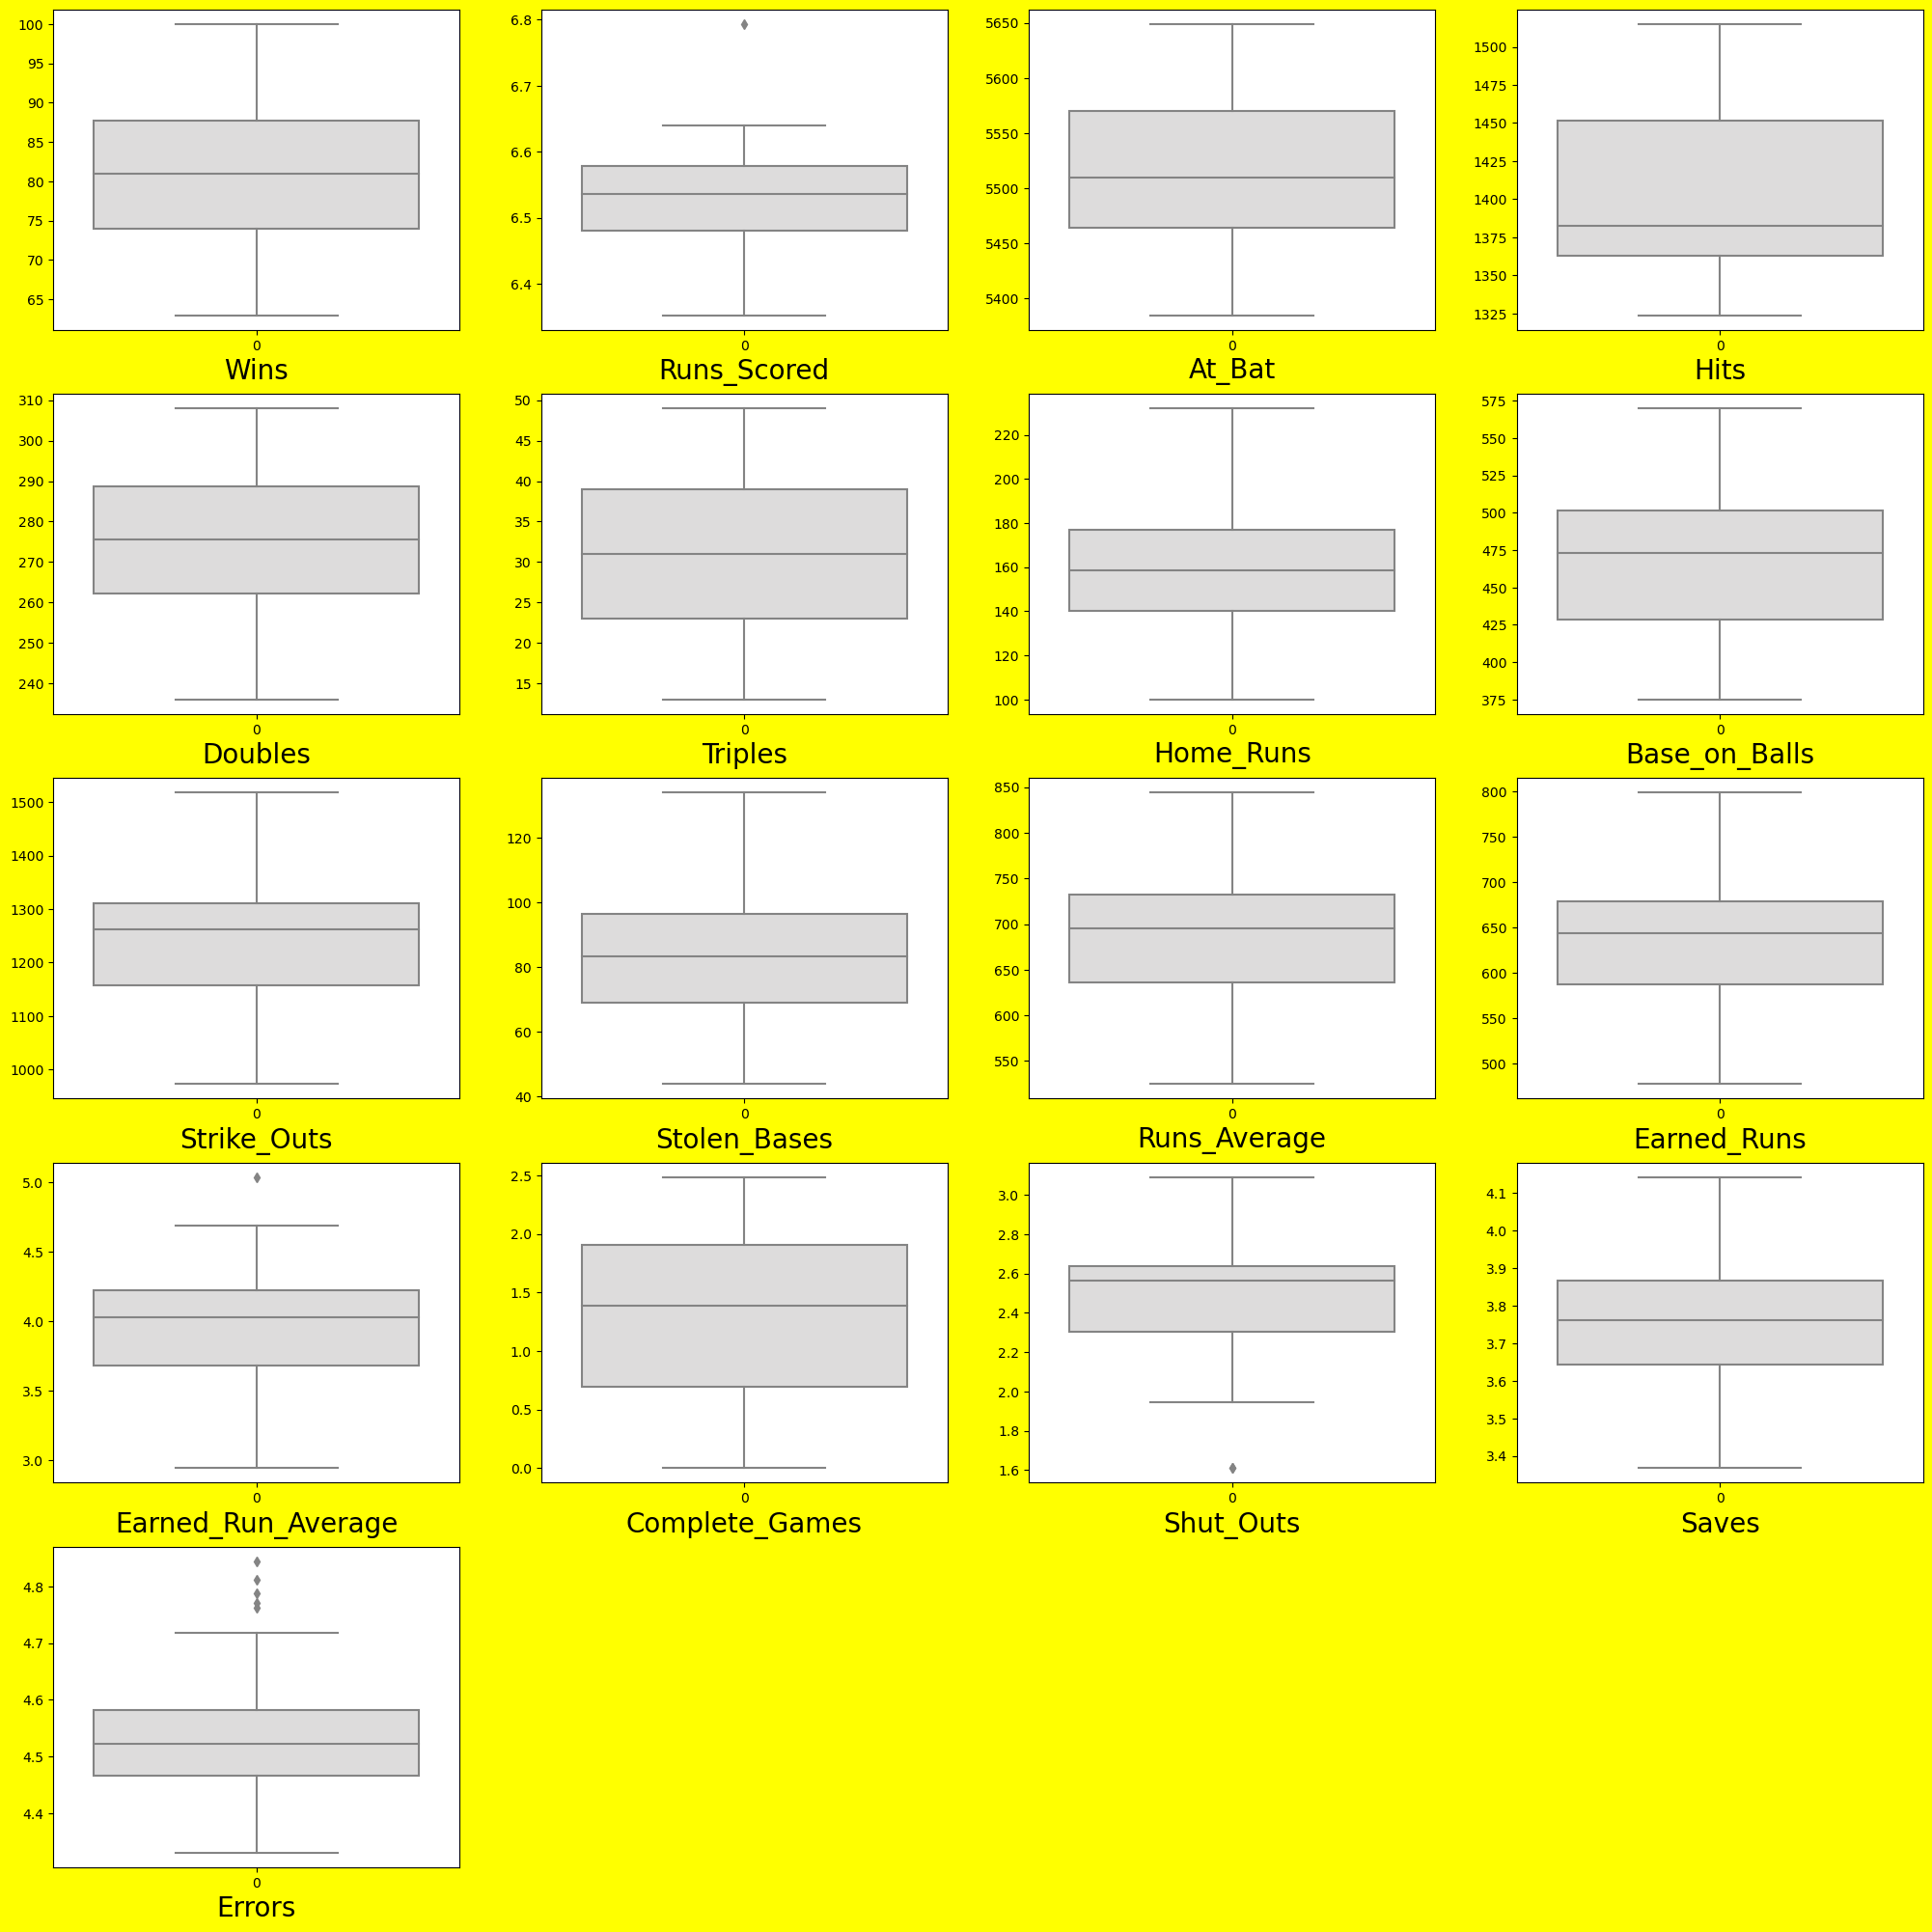

In [18]:
plt.figure(figsize=(25,25),facecolor='yellow')
index=1
for column in df:
    if index <=17:
        ax = plt.subplot(5,4,index)
        sns.boxplot(df[column], palette='coolwarm')
        plt.xlabel(column,fontsize=20)
    index+=1
plt.show()

Comment-

we can easily find out outlier in ('Runs Scored', 'Earned Run Average', 'Shut Outs', 'Saves' and 'Errors') that columns.
we can proceed accordingly.

# Outlier Removal

In [19]:
from scipy.stats import zscore

z_scores = np.abs(zscore(df))

# Set a threshold ( 3)
threshold = 3

# Remove outliers
df1 = df[(z_scores < threshold).all(axis=1)]

In [20]:
#Shape after removing outliers
print('Shape of dataset after removing outliers :',df1.shape)

Shape of dataset after removing outliers : (29, 17)


In [21]:
#Data Loss
print('Percentage Data Loss :',((30-29)/30)*100,'%')

Percentage Data Loss : 3.3333333333333335 %


# Checking Skewness

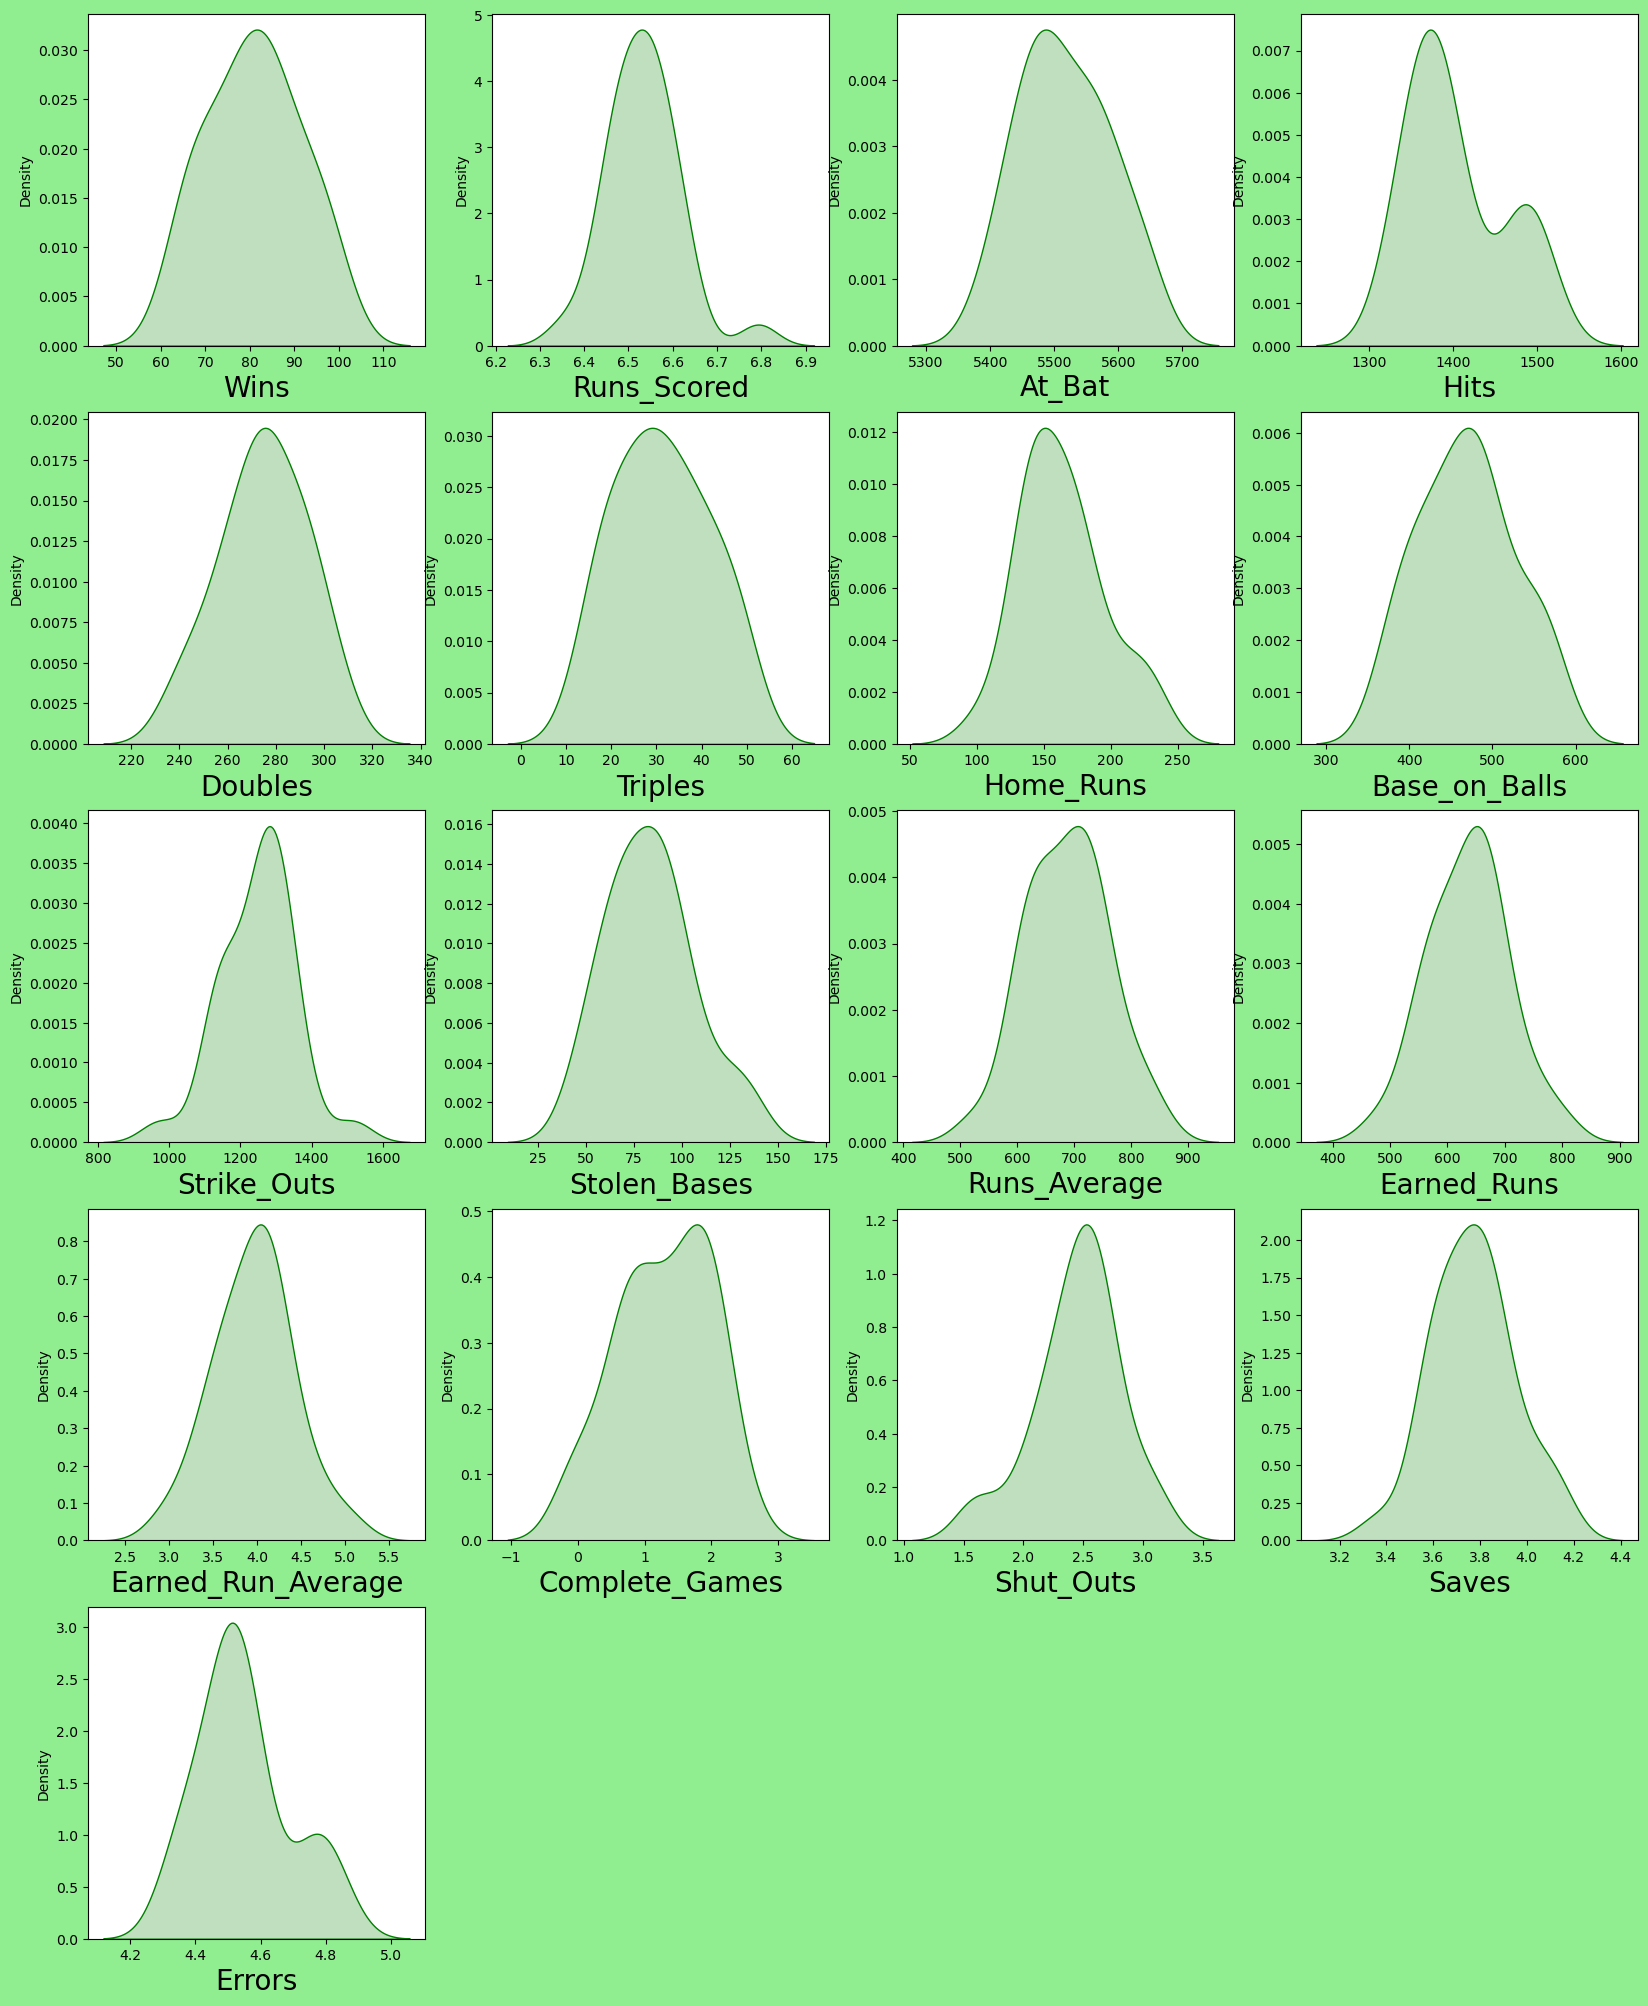

In [22]:
plt.figure(figsize=(20,25), facecolor='lightgreen')
plotnumber=1
for column in df:
    if plotnumber <=17:
        ax = plt.subplot(5,4,plotnumber)
        sns.distplot(df[column], color='g',hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

Comment-
'Runs Scored', 'Complete Game', 'Shut Outs' and 'Errors' columns have slightly skewed and it will need to be treated accordingly. Rest columns are Normally distributed.

In [23]:
df1.skew()

Wins                  0.119013
Runs_Scored          -0.388428
At_Bat                0.169573
Hits                  0.783772
Doubles              -0.335304
Triples               0.090124
Home_Runs             0.450862
Base_on_Balls         0.151193
Strike_Outs          -0.233815
Stolen_Bases          0.494966
Runs_Average          0.018155
Earned_Runs           0.018461
Earned_Run_Average    0.016693
Complete_Games       -0.275681
Shut_Outs            -0.598073
Saves                 0.109983
Errors                0.586101
dtype: float64

Comment -

-Optimal range for skewness is -0.5 to 0.5.
-Hits, Complete Game, Shuts Outs, Saves, Errors are positively Skewed in nature, need to transform.

In [24]:
df1.columns


Index(['Wins', 'Runs_Scored', 'At_Bat', 'Hits', 'Doubles', 'Triples',
       'Home_Runs', 'Base_on_Balls', 'Strike_Outs', 'Stolen_Bases',
       'Runs_Average', 'Earned_Runs', 'Earned_Run_Average', 'Complete_Games',
       'Shut_Outs', 'Saves', 'Errors'],
      dtype='object')

# Removing Skewness of Dataset using the LOGARITHMIC Transformation.
Applying the logarithmic transformation tends to compress higher values more than lower values, helping to reduce right skewness.

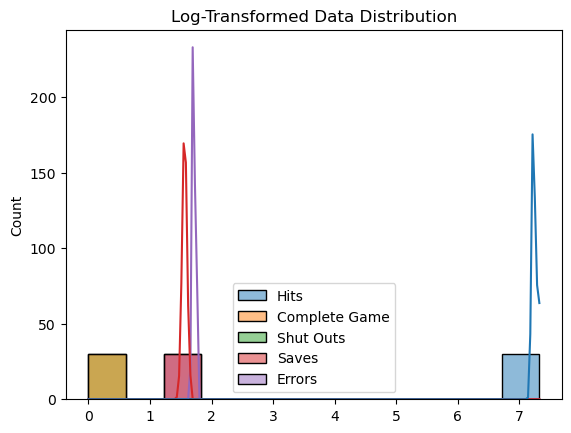

In [27]:
# Add missing columns with a default value of 0
for col in ['Hits', 'Complete Game', 'Shut Outs', 'Saves', 'Errors']:
    if col not in df.columns:
        df[col] = 0

# Log transformation
df[column_name] = np.log1p(df[column_name])

# Plot the transformed data to check for skewness
sns.histplot(df[column_name], kde=True)
plt.title('Log-Transformed Data Distribution')
plt.show()

In [28]:
df1.skew()

Wins                  0.119013
Runs_Scored          -0.388428
At_Bat                0.169573
Hits                  0.783772
Doubles              -0.335304
Triples               0.090124
Home_Runs             0.450862
Base_on_Balls         0.151193
Strike_Outs          -0.233815
Stolen_Bases          0.494966
Runs_Average          0.018155
Earned_Runs           0.018461
Earned_Run_Average    0.016693
Complete_Games       -0.275681
Shut_Outs            -0.598073
Saves                 0.109983
Errors                0.586101
dtype: float64

Comment-
All features skewness is now transform within permissible limit of -0.5 to 0.5 as shown above

# Correlation Between Dataset Columns

<Axes: >

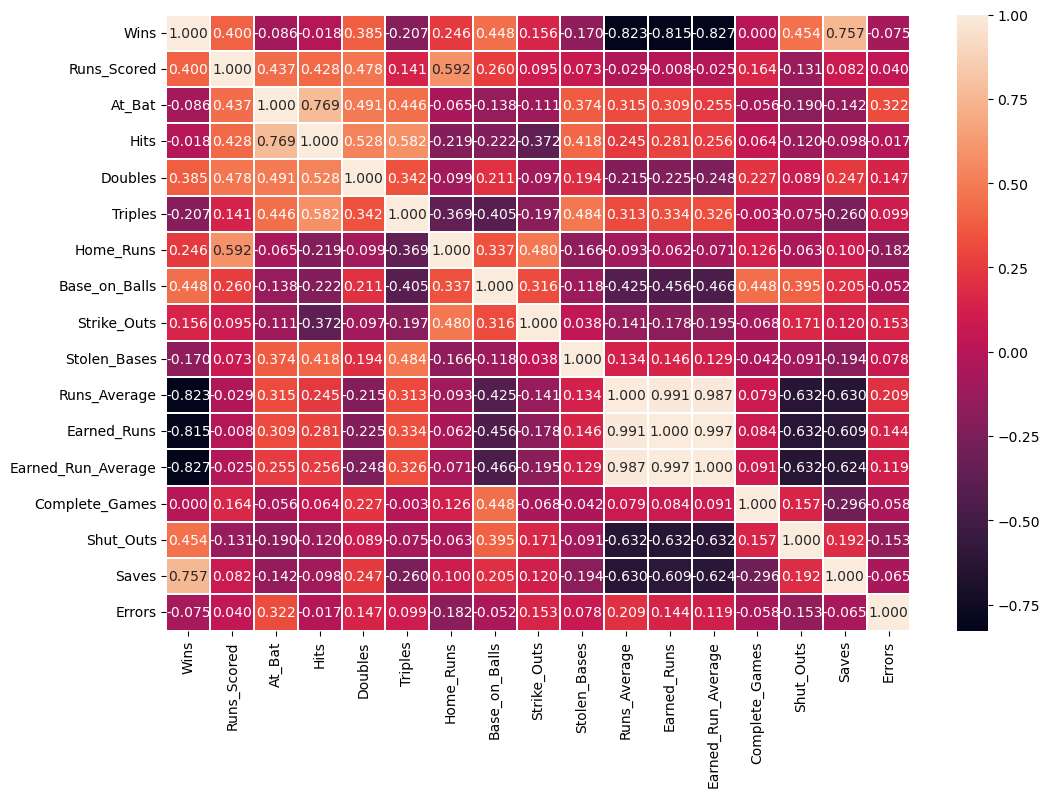

In [29]:
# we can analyse correlation through heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(),linewidth=0.1,fmt='0.3f',annot=True)

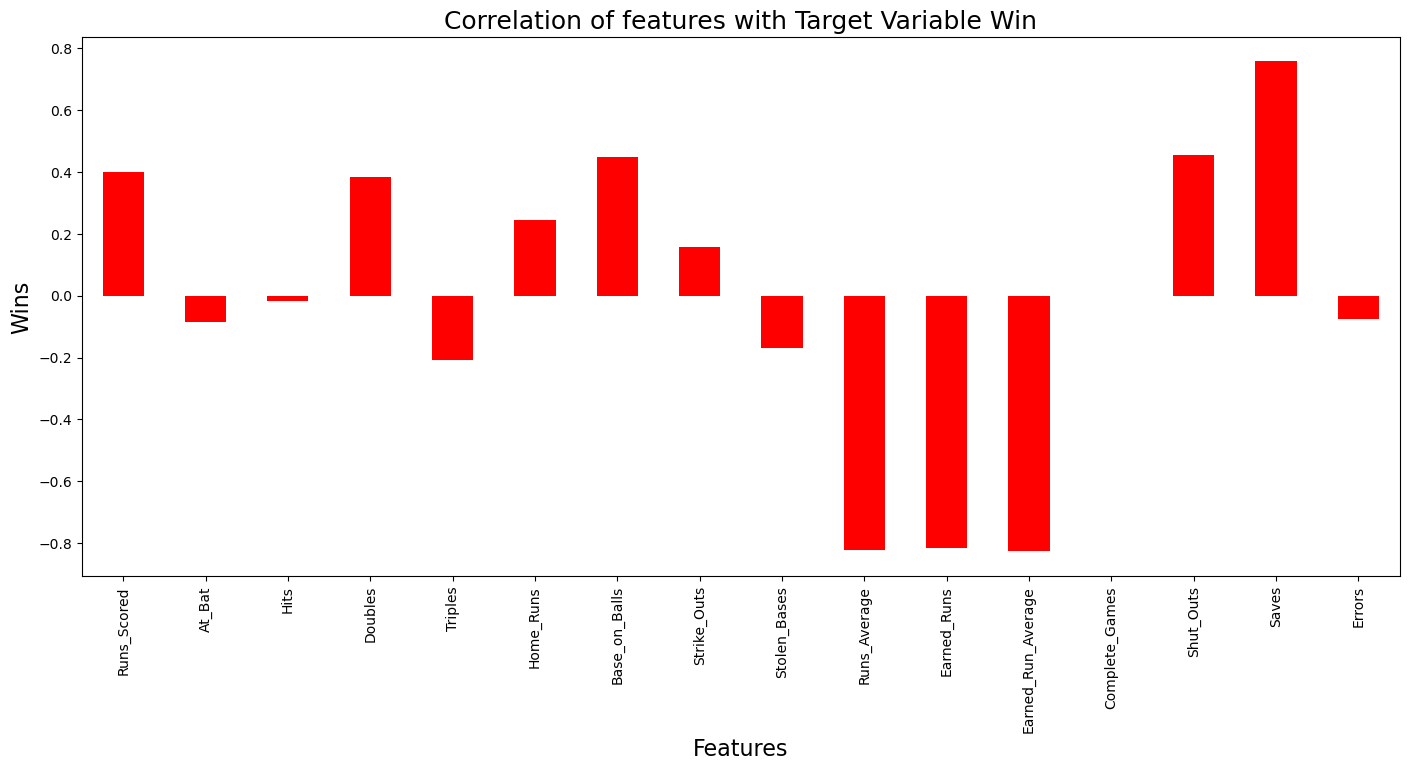

In [30]:
plt.figure(figsize = (17,7))
df1.corr()['Wins'].drop(['Wins']).plot(kind='bar',color = 'r')
plt.xlabel('Features',fontsize=16)
plt.ylabel('Wins',fontsize=16)
plt.title('Correlation of features with Target Variable Win',fontsize = 18)
plt.show()

# Comment-
we can observe the correlation of Dataset through this heatmap and bar garph.

'Runs Average', 'Earned Runs' and 'Earned Run Average' have strong correlation. And these columns have negative coorelation to column (Wins) .

In [35]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming df is your dataframe
# ... (previous code for df)

# Create a copy of the dataframe to avoid modifying the original one
df1 = df.copy()

# Drop the target variable (if any) before calculating VIF
# Replace 'target_var' with your target variable's name
if 'target_var' in df1.columns:
    df1.drop(['target_var'], axis=1, inplace=True)

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['Features'] = df1.columns

print(vif)

              VIF            Features
0      823.832046                Wins
1   114470.730447         Runs_Scored
2    84717.467959              At_Bat
3   160289.084670                Hits
4      715.426048             Doubles
5       33.439380             Triples
6      309.136126           Home_Runs
7      267.452111       Base_on_Balls
8      391.238809         Strike_Outs
9       27.620517        Stolen_Bases
10   16778.847277        Runs_Average
11  154037.325312         Earned_Runs
12  113745.608677  Earned_Run_Average
13      13.250935      Complete_Games
14     146.964061           Shut_Outs
15   10701.938880               Saves
16    9000.072657              Errors
17            NaN       Complete Game
18            NaN           Shut Outs


# Comment-
Here we can see that 'Runs Average','Earned Runs'and 'Earned Run Averge' are highly correlated. And reason is data is not scaled.

# Standard Scaling

In [36]:
X=df1.iloc[:,1:-1]
y=df1.iloc[:,0]

In [37]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [38]:
X_scaled=scaler.fit_transform(X)

# Principal Component Analysis (PCA)
PCA is a dimensionality reduction technique that transforms correlated variables into a set of linearly uncorrelated variables (principal components).

Implementing PCA can help address multicollinearity.

In [39]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [41]:
X_ = pd.DataFrame(X_pca, columns=np.arange(1, X_pca.shape[1] + 1))

variables with high VIF (typically VIF > 5 or 10), you may consider removing one of the highly correlated variables to address multicollinearity

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif_data = pd.DataFrame()
vif_data["Features List"]=X.columns
vif_data["VIF Value"]=[variance_inflation_factor(X_.values, i)
                          for i in range(len(X_.columns))]
vif_data

,Features List,VIF Value
0,Runs_Scored,1.0
1,At_Bat,1.0
2,Hits,1.0
3,Doubles,1.0
4,Triples,1.0
5,Home_Runs,1.0
6,Base_on_Balls,1.0
7,Strike_Outs,1.0
8,Stolen_Bases,1.0
9,Runs_Average,1.0


In [43]:
X_.skew()

1     0.113479
2     0.090312
3    -0.313545
4    -0.319358
5     0.104505
6     0.728289
7     0.121501
8     0.513746
9     0.324669
10   -0.094414
11    0.989981
12    0.863006
13   -0.203423
14    0.201220
15    0.162251
16    0.261569
17    0.000000
dtype: float64

# Machine learning Model

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

# LinearRegression

In [45]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [46]:
maxR2_score=0
maxRS=0
for i in range(0,200):
    X_train, X_test, y_train, y_test = train_test_split(X_, y, random_state=i, test_size=.2)
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    R2=r2_score(y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
        
print('Best R2 Score is: ', (maxR2_score)*100 ,'\nAt Random State: ', maxRS)

Best R2 Score is:  92.89556280155664 
At Random State:  5


# Prediction Based on Model

In [47]:
pred_data=pd.DataFrame({'predicted values':y_pred,'actual values':y_test})
pred_data

,predicted values,actual values
17,99.464281,97
12,87.388717,85
27,81.865258,79
9,91.081296,78
15,108.672920,100
14,111.466189,68



# Evaluation Metrics

In [48]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

print('\033[1m'+' Error :'+'\033[0m')
print('\nMean absolute error:',mean_absolute_error(y_test,y_pred))
print('\nMean squared error:',mean_squared_error(y_test,y_pred))
print('\nRoot Mean Sqaured Error:',np.sqrt(mean_squared_error(y_test,y_pred)))

 Error :

Mean absolute error: 12.156443602846245

Mean squared error: 359.2729680617756

Root Mean Sqaured Error: 18.95449730438071


# Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()

In [50]:
maxR2_score=0
maxRS=0
for i in range(0,200):
    X_train, X_test, y_train, y_test = train_test_split(X_, y, random_state=i, test_size=.2)
    lgr.fit(X_train,y_train)
    y_pred1=lgr.predict(X_test)
    R2=r2_score(y_test,y_pred1)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
        
print('Best R2 Score is: ', (maxR2_score)*100 ,'\nAt Random State: ', maxRS)

Best R2 Score is:  93.28165374677002 
At Random State:  97


In [51]:
pred_data1=pd.DataFrame({'predicted values':y_pred1,'actual values':y_test})
pred_data1

,predicted values,actual values
17,83,97
12,83,85
27,74,79
9,88,78
15,80,100
14,76,68


# Decision Tree Classifier

In [52]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [53]:
maxR2_score=0
maxRS=0
for i in range(0,200):
    X_train, X_test, y_train, y_test = train_test_split(X_, y, random_state=i, test_size=.2)
    dtc.fit(X_train,y_train)
    y_pred2=dtc.predict(X_test)
    R2=r2_score(y_test,y_pred2)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
        
print('Best R2 Score is: ', (maxR2_score)*100 ,'\nAt Random State: ', maxRS)

Best R2 Score is:  81.2870634746321 
At Random State:  73


In [54]:
pred_data2=pd.DataFrame({'predicted values':y_pred2,'actual values':y_test})
pred_data2

,predicted values,actual values
17,84,97
12,71,85
27,83,79
9,81,78
15,80,100
14,68,68


# Hyper Parameter Tuning

In [55]:
from sklearn.model_selection import GridSearchCV
lr=LinearRegression()
param={'fit_intercept' : [True, False],
              'copy_X' : [True, False],
              'positive' : [True, False],
              'n_jobs' : [-2, -1, 1]
             }

In [56]:
gsv=GridSearchCV(lr,param,cv=5)

In [57]:
gsv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [-2, -1, 1],
                         'positive': [True, False]})

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [58]:
gsv.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': -2, 'positive': False}

In [59]:
model = LinearRegression(fit_intercept= True, copy_X= True, n_jobs= -2, positive= False)

In [60]:
model.fit(X_train,y_train)
pred = model.predict(X_test)
print('R2 score: ',r2_score(y_test,pred))
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred))
print('Mean Squared Error: ',mean_squared_error(y_test,pred))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred)))

R2 score:  -1.9071312317877998
Mean Absolute Error:  12.156443602846245
Mean Squared Error:  359.2729680617756
Root Mean Squared Error:  18.95449730438071


In [61]:
prediction_=pd.DataFrame({'predicted values':pred,'actual values':y_test})
prediction_

,predicted values,actual values
17,99.464281,97
12,87.388717,85
27,81.865258,79
9,91.081296,78
15,108.672920,100
14,111.466189,68


saving most deficient model

# Saving a Model

In [62]:
import joblib
joblib.dump(model,'Baseball_model.pkl')

['Baseball_model.pkl']